**Universidade Federal do Pará**

**Mestrado em Computação Aplicada PPCA/Tucuruí**

**Disciplina: Inteligência Artificial**

Laciene Alves Melo

---

> Objetivo: Aplicar modelos de agrupamento na base de dados iris

In [133]:
# bibliotecas
import pandas as pd
import numpy as np
# encoder
from sklearn.preprocessing import LabelEncoder

# importando a biblioteca KMeans
from sklearn.cluster import KMeans

# importando a biblioteca KMedoids
from sklearn_extra.cluster import KMedoids

# importando a biblioteca AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

# Importando as bibliotecas MeanShift
from sklearn.cluster import MeanShift

# gráfico
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score


In [134]:
# carregando a base de dados
dataset = pd.read_csv('../dataset/iris.csv')
dataset

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [135]:
# agrupar por class
group = dataset.groupby(['class']).size()
group

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [136]:
# transformação de dados
cols = ['sepal length','sepal width','petal length','petal width','class']

# Importe o LabelEncoder
le = LabelEncoder()

# Iterar sobre as colunas categóricas e aplicar o LabelEncoder a cada uma delas
for col in cols:
    dataset[col] = le.fit_transform(dataset[col])


In [137]:
# previsores
X = dataset
X = X.drop(columns=['class'])

In [138]:
# classe de saída
y = dataset['class']

In [139]:
# Especificando as cores
color_dict = {0: 'red', 1: 'blue', 2: 'green'}

# Modelo de Agrupamento K-Means

In [140]:
# aplica o modelo KMeans com 3 clusters
KMeans = KMeans(n_clusters=3)
KMeans.fit(X)

/Users/lacienemelo/Documents/developed-software/python-dev/virtual-environment/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [159]:
# Obter o centro de cluster
centerKMeans = KMeans.cluster_centers_
centerKMeans

array([[25.31578947,  9.73684211, 33.13157895, 16.71052632],
       [ 7.05555556, 12.35185185,  5.        ,  1.7962963 ],
       [16.63793103,  6.79310345, 20.70689655, 10.62068966]])

In [160]:
# Obter os rótulos dos clusters
labelsKMeans = KMeans.labels_
labelsKMeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

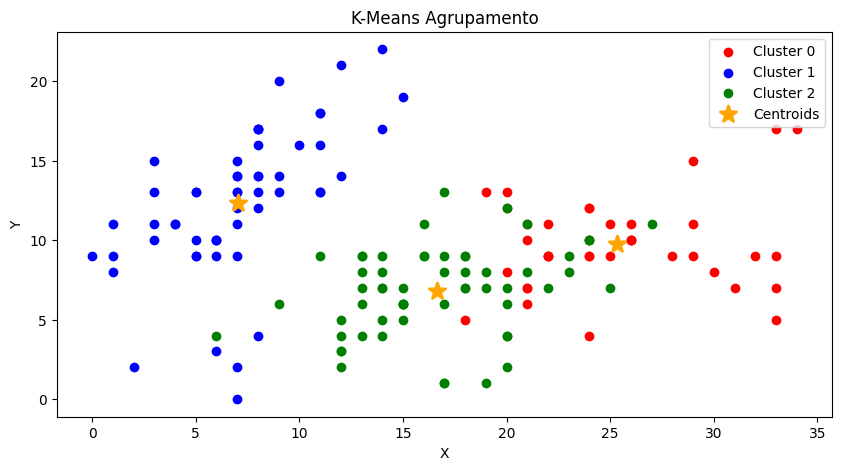

In [143]:
# Plotando o gráfico de dispersão com cores diferentes para cada cluster
plt.figure(figsize=(10, 5))

# Plotar os dados de dispersão para cada cluster
for i in range(len(np.unique(labelsKMeans))):
    plt.scatter(X.iloc[labelsKMeans == i, 0], X.iloc[labelsKMeans == i, 1], color=color_dict[i], label='Cluster {}'.format(i))

# Plotar os centróides dos clusters
plt.scatter(centerKMeans[:, 0], centerKMeans[:, 1], marker='*', s=150, color='orange', label='Centroids', linewidths=2)

plt.title('K-Means Agrupamento')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [161]:
# Cálculo da métrica de silhouette
silhouetteKMeans = silhouette_score(X, labelsKMeans)
silhouetteKMeans

0.494938930793701

# Modelo de Agrupamento K-Medoids

In [145]:
# criando o modelo com 3 clusters
KMedoids = KMedoids(n_clusters=3)
KMedoids.fit(X)

KMedoids(n_clusters=3)

In [163]:
# Obter os rótulos dos clusters
labelsKMedoids = KMedoids.labels_
labelsKMedoids

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [164]:
# Obter o centro de cluster
centerKMedoids = KMedoids.cluster_centers_
centerKMedoids

array([[14.,  7., 17.,  9.],
       [ 7., 13.,  5.,  1.],
       [22.,  9., 28., 16.]])

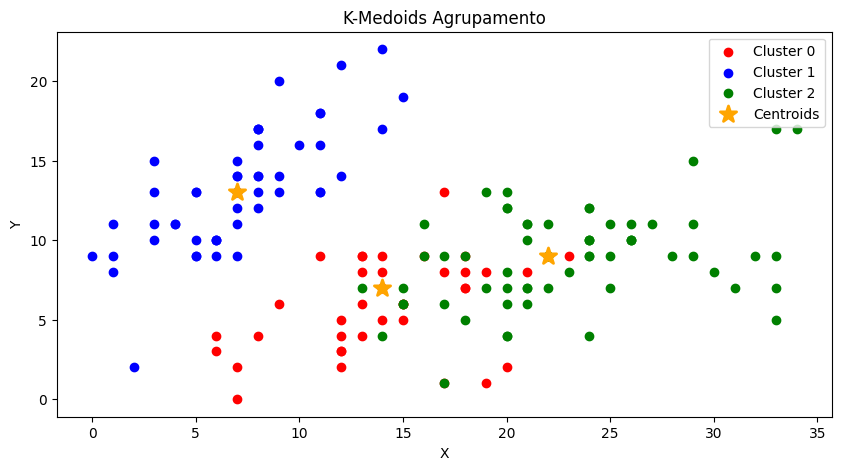

In [148]:
# Plotando o figura de dispersão com cores diferentes para cada cluster
plt.figure(figsize=(10, 5))

# Plotar os dados de dispersão para cada cluster
for i in range(len(np.unique(labelsKMeans))):
    plt.scatter(X.iloc[labelsKMedoids == i, 0], X.iloc[labelsKMedoids == i, 1], color=color_dict[i], label='Cluster {}'.format(i))

# Plotar os centróides dos clusters
plt.scatter(centerKMedoids[:, 0], centerKMedoids[:, 1], marker='*', s=150, color='orange', label='Centroids', linewidths=2)

plt.title('K-Medoids Agrupamento')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [149]:
# Cálculo da métrica de silhouette
silhouetteKMedoids = silhouette_score(X, labelsKMedoids)
silhouetteKMedoids

0.46318685717445324

# Modelo de Agrupamento Hierarchical Clustering

In [150]:
# criando o modelo com 3 clusters
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical.fit(X)

AgglomerativeClustering(n_clusters=3)

In [165]:
# Obter os rótulos dos clusters
labelsHC = hierarchical.labels_
labelsHC

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

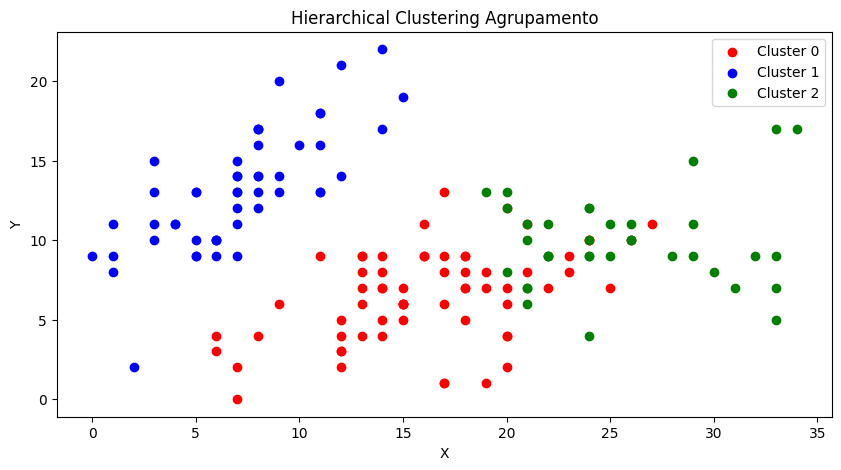

In [152]:
# Plotando o gráfico de dispersão com cores diferentes para cada cluster
plt.figure(figsize=(10, 5))

# Plotar os dados de dispersão para cada cluster
for i in range(len(np.unique(labelsHC))):
    plt.scatter(X.iloc[labelsHC == i, 0], X.iloc[labelsHC == i, 1], color=color_dict[i], label='Cluster {}'.format(i))

plt.title('Hierarchical Clustering Agrupamento')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [153]:
# Cálculo da métrica de silhouette
silhouetteHC = silhouette_score(X, labelsHC)
silhouetteHC

0.4899825502859212

# Modelo de Agrupamento Mean Shift

In [154]:
# Criando o objeto Mean Shift
ms = MeanShift()
ms.fit(X)

MeanShift()

In [166]:
# Obtendo os rótulos de cluster correspondentes
labelsMS = ms.labels_
labelsMS

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [167]:
# Obtendo o centro dos clusters
centerMS = ms.cluster_centers_
centerMS

array([[19.17391304,  7.95652174, 24.66666667, 12.79710145],
       [ 7.16326531, 13.3877551 ,  4.63265306,  1.42857143]])

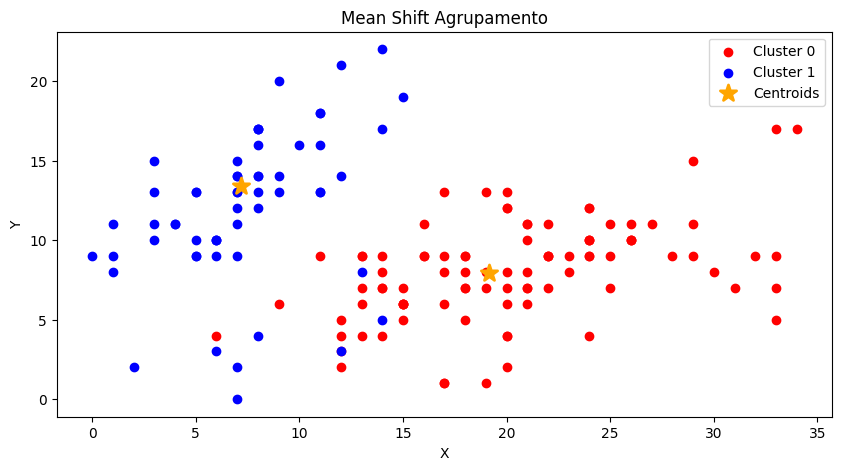

In [157]:
# Plotando o gráfico de dispersão com cores diferentes para cada cluster
plt.figure(figsize=(10, 5))

# Plotar os dados de dispersão para cada cluster
for i in range(len(np.unique(labelsMS))):
    plt.scatter(X.iloc[labelsMS == i, 0], X.iloc[labelsMS == i, 1], color=color_dict[i], label='Cluster {}'.format(i))

# Plotar os centróides dos clusters
plt.scatter(centerMS[:, 0], centerMS[:, 1], marker='*', s=150, color='orange', label='Centroids', linewidths=2)

plt.title('Mean Shift Agrupamento')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [158]:
# Cálculo da métrica de silhouette
silhouetteMS = silhouette_score(X, labelsMS)
silhouetteMS

0.5638617067776203